In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
plt.style.use('ggplot') # This styles the graphs in a nicer format

In [2]:
# users = pd.read_table('users_clean2.csv', sep=',')
# users = pd.read_csv('users_clean2.csv') 

In [3]:
# users.head()

In [4]:
# users = users.fillna(0)

In [5]:
# keep_cols = ['user_email','churned']
# users_num = users[keep_cols]
# #df1 = df[['a','b']]
# users_num.head()

In [6]:
# users = users.drop('user_email', 1)
# users = users.drop('billing_email', 1)
# users.head()

In [7]:
# users_con = pd.concat([pd.get_dummies(users[col]) for col in users], axis=1, keys=users.columns)

In [8]:
# users_con.head()

In [9]:
# users_df = [users_num,users_con]

In [10]:
# users_con = pd.concat(users, axis=1)

In [14]:
users = pd.read_table('train.csv', sep=',')
users = pd.read_csv('train.csv') 

In [13]:
# users = users.drop('user_email', 1)
# users = users.drop('Unnamed: 0', 1)
# users = users.drop('(churned, 0.0)', 1)

# users.head()

,"(_order_count, 0.0)","(_order_count, 1.0)","(_order_count, 2.0)","(_order_count, 3.0)","(_order_count, 4.0)","(_order_count, 5.0)","(_order_count, 6.0)","(_order_count, 7.0)","(_order_count, 8.0)","(_order_count, 9.0)",...,"(billing_postcode, V7K 1S7)","(billing_postcode, V8A 2Z1)","(billing_postcode, V8L 1P4)","(billing_postcode, V8X 4A4)","(billing_postcode, V9N 9X4)","(billing_postcode, WA6009)","(billing_postcode, YO43 3RA)","(paying_customer, 0.0)","(paying_customer, 1.0)","(churned, cancelled)"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
churn_result = users['TARGET']
users = users.drop('TARGET', 1)
y = churn_result
users.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39205.170000
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49278.030000
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,67333.770000
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64007.970000
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117310.979016


In [18]:
remove = []
for col in users.columns:
    if users[col].std() == 0:
        remove.append(col)

users.drop(remove, axis=1, inplace=True)


# remove duplicated columns
remove = []
c = users.columns
for i in range(len(c)-1):
    v = users[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,users[c[j]].values):
            remove.append(c[j])

In [19]:
features = users.columns

X = users.as_matrix().astype(np.float)
X.shape

(76020L, 336L)

In [20]:
features

Index([u'ID', u'var3', u'var15', u'imp_ent_var16_ult1',
       u'imp_op_var39_comer_ult1', u'imp_op_var39_comer_ult3',
       u'imp_op_var40_comer_ult1', u'imp_op_var40_comer_ult3',
       u'imp_op_var40_efect_ult1', u'imp_op_var40_efect_ult3',
       ...
       u'saldo_medio_var29_ult3', u'saldo_medio_var33_hace2',
       u'saldo_medio_var33_hace3', u'saldo_medio_var33_ult1',
       u'saldo_medio_var33_ult3', u'saldo_medio_var44_hace2',
       u'saldo_medio_var44_hace3', u'saldo_medio_var44_ult1',
       u'saldo_medio_var44_ult3', u'var38'],
      dtype='object', length=336)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

Feature space holds 76020 observations and 336 features
Unique target labels: [0 1]


In [22]:
from sklearn.cross_validation import KFold

kf = KFold(len(y),n_folds=5,shuffle=True)
len(kf)

print(kf)

for train_index, test_index in kf:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

sklearn.cross_validation.KFold(n=76020, n_folds=5, shuffle=True, random_state=None)
('TRAIN:', array([    0,     1,     2, ..., 76015, 76016, 76017]), 'TEST:', array([    4,    16,    18, ..., 76001, 76018, 76019]))
('TRAIN:', array([    0,     1,     2, ..., 76016, 76018, 76019]), 'TEST:', array([    3,    13,    21, ..., 76011, 76012, 76017]))
('TRAIN:', array([    0,     3,     4, ..., 76017, 76018, 76019]), 'TEST:', array([    1,     2,     6, ..., 76009, 76014, 76016]))
('TRAIN:', array([    1,     2,     3, ..., 76017, 76018, 76019]), 'TEST:', array([    0,     8,     9, ..., 75993, 75996, 76004]))
('TRAIN:', array([    0,     1,     2, ..., 76017, 76018, 76019]), 'TEST:', array([    5,     7,    11, ..., 76010, 76013, 76015]))


In [23]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
# Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
   
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [24]:
def run_prob_cv(X, y, clf_class, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

In [20]:
import sklearn
print(sklearn.__version__)

0.17.1


In [30]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X.shape

clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
#X_new.shape
clf

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN

def accuracy(y_true,y_pred):
   
    return np.mean(y_true == y_pred)

print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X,y,KNN))

Support vector machines:


KeyboardInterrupt: 

In [117]:
rf = RF(max_depth=5, n_estimators=50)
rff_train = rf.fit(X_train, y_train)
rff_test = rf.fit(X, y)
rfs_test = rf.score(X_train, y_train)
rfs_train = rf.score(X, y)
rfp = rf.predict(X_train)
#rfa = rf.accuracy(X_train, y_train)
# print rfs_test
# print rfs_train


SyntaxError: invalid syntax (<ipython-input-117-2cded7d25e30>, line 10)

In [37]:
users1 = pd.DataFrame(rfp, columns=['pred_prob'])
users1

NameError: name 'rfp' is not defined

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(X_new, y)

labels = ['Churn', 'Non-Churn']
#print()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
for i, cas in enumerate(cm):
    for j, c in enumerate(cas):
        if c>0:
            plt.text(j-.2, i+.2, c, fontsize=14, color='white')
plt.title('Confusion matrix for Random Forest')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
#plt.text()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
width, height = cm.shape

ValueError: Can't handle mix of multilabel-indicator and binary

In [42]:
import warnings
warnings.filterwarnings('ignore')

# Use 10 estimators so predictions are all multiples of 0.1
pred_prob = run_prob_cv(X_new, y, RF, n_estimators=10)
pred_churn = pred_prob[:,1]
is_churn = y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)

# calculate true probabilities
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
    true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts

,pred_prob,count,true_prob
0,0.0,5153,0.014555
1,0.1,89,0.056180
2,0.2,28,0.035714
3,0.3,22,0.045455
4,0.4,9,0.000000
5,0.5,8,0.000000
6,0.6,5,0.000000
7,0.7,2,0.000000
8,0.8,1,0.000000


Feature ranking:


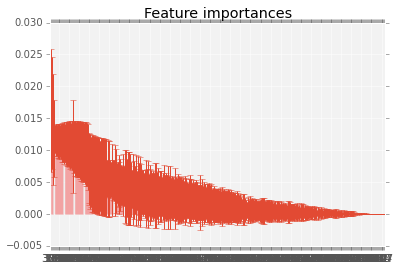

In [26]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

cm = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

cm.fit(X_new, y)
importances = cm.feature_importances_
std = np.std([tree.feature_importances_ for tree in cm.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_new.shape[1]), indices)
plt.xlim([-1, X_new.shape[1]])
plt.show()

In [28]:
print X_new

[[-0.38455726 -0.19303114 -0.18933168 ..., -0.01371537 -0.69328642
   0.69328642]
 [-0.38455726 -0.19303114 -0.18933168 ..., -0.01371537  1.44240529
  -1.44240529]
 [-0.38455726 -0.19303114 -0.18933168 ..., -0.01371537 -0.69328642
   0.69328642]
 ..., 
 [-0.38455726 -0.19303114 -0.18933168 ..., -0.01371537 -0.69328642
   0.69328642]
 [-0.38455726 -0.19303114 -0.18933168 ..., -0.01371537 -0.69328642
   0.69328642]
 [-0.38455726  5.1805112  -0.18933168 ..., -0.01371537 -0.69328642
   0.69328642]]


In [2]:
import sklearn.feature_selection

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

NameError: name 'Pipeline' is not defined